# 4. Project: Text Classification

<img src='frequent words in songs.png' style=width:600px;height:400px/>

In this project, we will build a text classification model on song lyrics. The task is to predict the artist from a piece of text. To train such a model, you first need to collect your own lyrics dataset:

Download a HTML page with links to songs

Extract hyperlinks of song pages

Download and extract the song lyrics

Vectorize the text using the Bag Of Words method

train a classification model that predicts the artist from a piece of text

refactor the code into functions

Write a simple command-line interface for the program

upload your code to GitHub

In [358]:
#import all needed packages
import re
from time import sleep
from bs4 import BeautifulSoup as bs
import urllib.request, urllib.parse, urllib.error 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import remove_stopwords

import warnings
warnings.filterwarnings("ignore")

In [182]:
#use this cell to enter information about the singer and the song.
#make a list of links for each song
url=['https://www.azlyrics.com/lyrics/jamesarthur/certainthings.html',
     'https://www.azlyrics.com/lyrics/jamesarthur/isthislove.html',
     'https://www.azlyrics.com/lyrics/jamesarthur/always.html',
     'https://www.azlyrics.com/lyrics/jamesarthur/brokenhearted.html',
     'https://www.azlyrics.com/lyrics/disturbed/voices.html',
     'https://www.azlyrics.com/lyrics/disturbed/numb.html',
    'https://www.azlyrics.com/lyrics/disturbed/thesoundofsilence.html',
    'https://www.azlyrics.com/lyrics/disturbed/neverwrong.html',
    'https://www.azlyrics.com/lyrics/metallica/thefourhorsemen.html',
    'https://www.azlyrics.com/lyrics/metallica/nothingelsematters.html',
    'https://www.azlyrics.com/lyrics/metallica/theunforgiven.html',
    'https://www.azlyrics.com/lyrics/metallica/entersandman.html']
file='lyrics.txt'
delay=8
#the input function to feed the objects with specifications.
artist=['james arthur', 'james arthur','james arthur', 'james arthur', 'disturbed', 'disturbed', 'disturbed', 'disturbed', 'metallica', 'metallica', 'metallica', 'metallica']
song=['certainthings', 'isthislove', 'always', 'Broken heart','voices','numb', 'thesoundofsilence', 'neverwrong', 'theunforgiven', 'nothingelsematters', 'unforgiven','sandman' ]

In [130]:
#correct and working well: bring all the songs from the website links
for i in range(len(url)):
    f= open(f'lyrics{i}.txt', "w")
    try:
        html_page=urllib.request.urlopen(url[i]).read()
        soup=bs(html_page,'html.parser')
        html_pointer=soup.find('div', attrs={'class': 'ringtone'})
        song_name=html_pointer.find_next('b').contents[0].strip()
        lyrics=html_pointer.find_next('div').text.strip()
        f.write(lyrics)
        print('Lyrics were written to file')
    except:
        print('not successful')
    
    finally:
        sleep(delay)     

Lyrics were written to file
Lyrics were written to file
Lyrics were written to file
Lyrics were written to file
Lyrics were written to file
Lyrics were written to file
Lyrics were written to file
Lyrics were written to file
Lyrics were written to file
Lyrics were written to file
Lyrics were written to file
Lyrics were written to file


# Cleaning 

# write a function that removes all unnecessary inputs in the file and removes the stop words

- get all possible stop words from different libraries

In [461]:
#make a comprehensive stop words file from all packages: nltk
#stop words from nltk
nltk.download('punkt')
nltk.download('stopwords') 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import remove_stopwords
nltk_stopwords=stopwords.words('english')
#stop words from gensim
import gensim
gensim_stopwords = gensim.parsing.preprocessing.STOPWORDS
#stop words from 
import spacy
sp = spacy.load('en_core_web_sm')
spacy_stopwords = sp.Defaults.stop_words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [462]:
#make one set of all stop words
nltk_set=set(stop_words_nltk);gensim_set=set(gensim_stopwords); gensim_set=set(spacy_stopwords)

- look at the files and add more stopwords that are not needed

In [463]:
stopextra=['Verse', 'x2', '1', '2', '3', '4', '5', '6 ', '7', '8', '9', '10', '11', 'Chorus', 'X3', 'X7', 'X2']

In [465]:
#get the difference of all of them
stopwords_all = nltk_set.union(gensim_stopwords, spacy_stopwords)
#stopwords_all
stopwords_all=list(stopwords_all)
stopword= stopwords_all + stopextra 
#convert all stopword to lowercase
stopword=[i.lower() for i in stopword]

In [466]:
#two steps of cleaning :) 
def clean(words, my_stopword):
    """split using only words"""
    step1=re.split(r'\W+', words)
    """ removing stop words"""
    step2= [word for word in step1 if not word in my_stopword]
    """ returning a list of one string using join"""
    return (" ").join(step2)

# Ready to import all songs and clean them and append them in one file

In [467]:
#read all file and put them in one list
#for loop to read and clean 
Lyrics=[]
final_lyrics=[]
for i in range(0,12):
    f=open(f'lyrics{i}.txt').read()
    Lyrics.append(f.lower())
    final_lyrics.append(clean(Lyrics[i].lower(), stopword))

In [363]:
#final_lyrics

In [468]:
#song before cleaning
lyrics_all[0]

"[Verse:]\nSomething about you\nIt's like an addiction\nHit me with your best shot honey\nI've got no reason to doubt you\n'Cause certain things hurt\nAnd you're my only virtue\nAnd I'm virtually yours\n\n[Pre-Chorus:]\nAnd you keep coming back, coming back again\nKeep running round, running round, running round my head\n\n[Chorus:]\nAnd there's certain things that I adore\nAnd there's certain things that I ignore\nBut I'm certain that I'm yours\nCertain that I'm yours\nCertain that I'm yours\n\n[Verse:]\nThere's something about you\nIt's when you get angry\nYou have me at your mercy\nAnd you're like the shoulder to turn to\n'Cause certain things mend us when we're hanging on for dear life\nWe held on so tight\n\n[Pre-Chorus:]\nAnd you keep coming back, coming back again\nKeep running round, running round, running round my head\n\n[Chorus x2:]\nAnd there's certain things that I adore\nAnd there's certain things that I ignore\nBut I'm certain that I'm yours\nCertain that I'm yours\nCert

In [469]:
print(f'the first song after cleaning:\n\n{final_lyrics[0]}')

the first song after cleaning:

 like addiction hit best shot honey got reason doubt cause certain things hurt virtue virtually pre coming coming running round running round running round head certain things adore certain things ignore certain certain certain angry mercy like shoulder turn cause certain things mend hanging dear life held tight pre coming coming running round running round running round head certain things adore certain things ignore certain certain certain adore adore certain


In [470]:
#make a sample comparison to see the difference in length
print(f'length of before cleaning {len(word_tokenize(lyrics_all[0]))} and after cleaning {len(word_tokenize(final_lyrics[0]))}')

length of before cleaning 228 and after cleaning 70


# Plotting

In [471]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import numpy as np
from PIL import Image
from wordcloud import WordCloud,ImageColorGenerator
%matplotlib inline

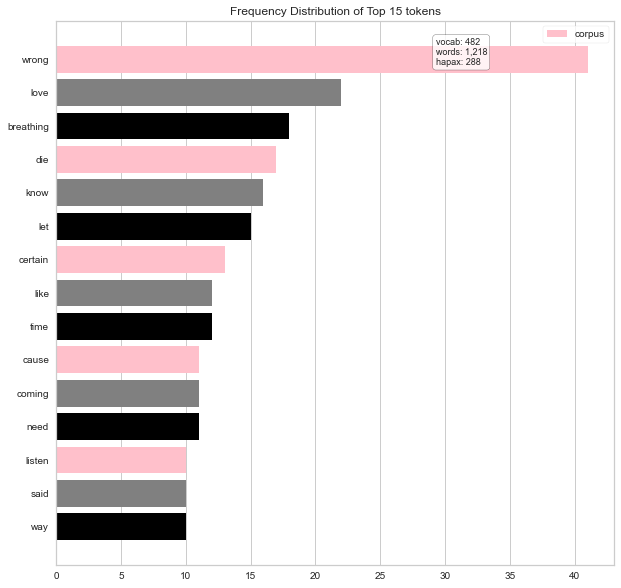

<Figure size 432x288 with 0 Axes>

In [472]:
# Create a bar chart from countvecterizer:
#pip install yellowbrick
from yellowbrick.text import FreqDistVisualizer

vectorizer = CountVectorizer()
docs= vectorizer.fit_transform(final_lyrics)
features= vectorizer.get_feature_names()

plt.figure(figsize=(10,10))
visualizer = FreqDistVisualizer(features=features, orient='h',n=15, color=['Pink', 'grey', 'black'], fontsize=15)
visualizer.fit(docs)
visualizer.show()
plt.savefig('Word Frequency.png')

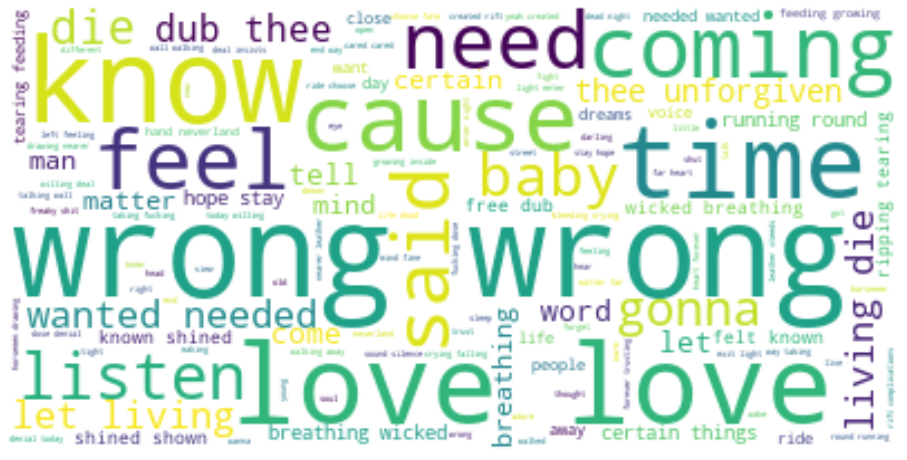

In [478]:
#make a word cloud for all lyrics
plt.figure(figsize=(16,16))
wordcloud = WordCloud(background_color="white").generate(str(final_lyrics))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('frequent words in songs.png')

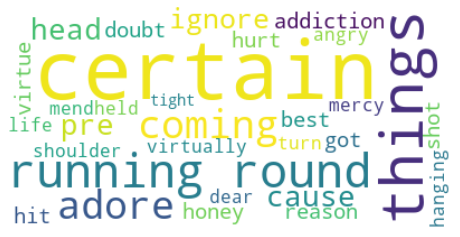

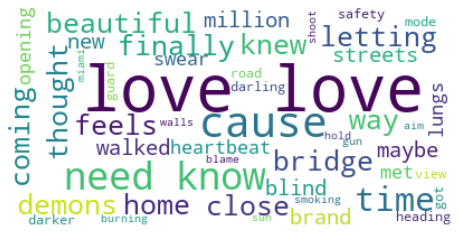

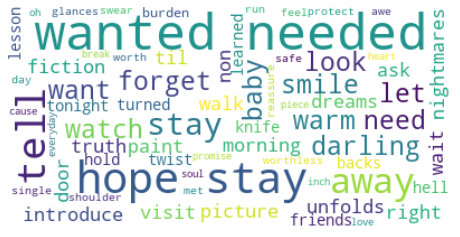

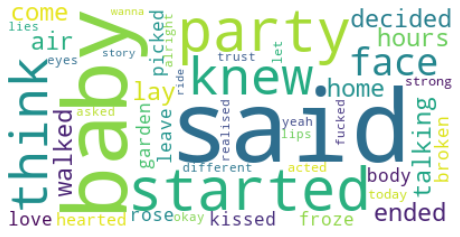

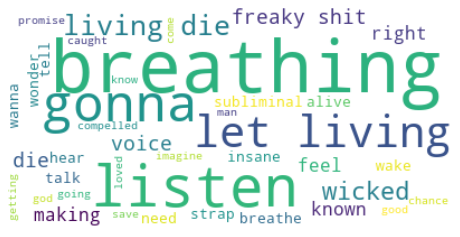

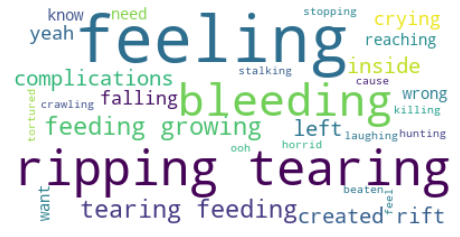

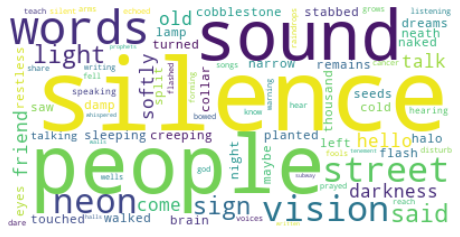

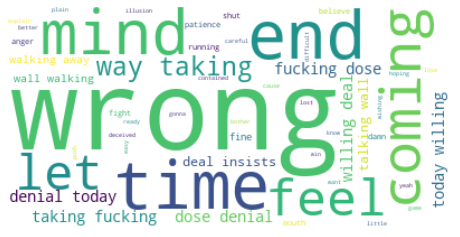

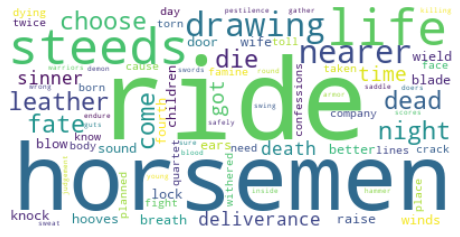

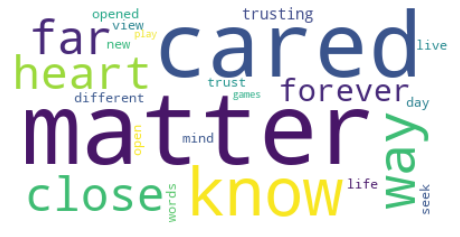

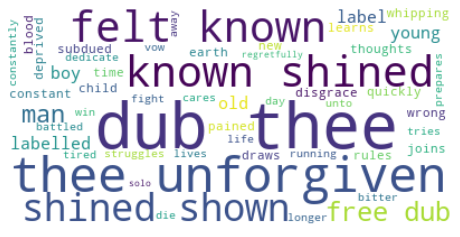

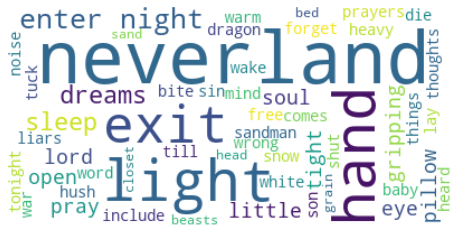

In [379]:
# Display the generated image:
for i in range(len(final_lyrics)):
    plt.figure(figsize=(8,8))
    wordcloud = WordCloud(background_color="white").generate(final_lyrics[i])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file(f'Song{i}.png')

# CountVectorizer

In [329]:
#create the count verctorizer
lyr_cv=CountVectorizer(stop_words='english')

In [330]:
#fit our data with the created vectorizer
out = lyr_cv.fit_transform(final_lyrics)

# Normalization

In [479]:
#Tf-Idf (Normalization)
#initiate the normalizer and normalize our output data (out)
tf = TfidfTransformer()
transformed = tf.fit_transform(out)
# create a dataframe for our normalized and densed data and get words from lyr_cv
tdf = pd.DataFrame(transformed.todense(), columns=lyr_cv.get_feature_names())
tdf.round(3).head(2)

,acted,addiction,adore,aim,air,alive,alright,anger,angry,armor,...,wonder,word,words,worth,worthless,writing,written,wrong,yeah,young
0,0.0,0.058,0.231,0.000,0.0,0.0,0.0,0.0,0.058,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000,0.000,0.055,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Logistic Regression

In [351]:
#identify the features and the response
X = tdf.values
y = artist

In [352]:
#train and split then initiate the logregression
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [353]:
y_train

['disturbed',
 'metallica',
 'james arthur',
 'disturbed',
 'metallica',
 'james arthur',
 'metallica',
 'james arthur',
 'james arthur']

In [354]:
#then initiate the logregression and check the scores
m = LogisticRegression()
m.fit(x_train, y_train)
m.score(x_test, y_test),m.score(x_train, y_train)

(0.0, 1.0)

In [355]:
#chreck the predictions for the train features. 
#m.predict_proba(x_train)
m.predict(x_train)

array(['disturbed', 'metallica', 'james arthur', 'disturbed', 'metallica',
       'james arthur', 'metallica', 'james arthur', 'james arthur'],
      dtype='<U12')

*make prediction for a new Song from metallica (Unforgiven)*

# Naive Bayes

- first remove some songs to use them for the test

In [438]:
#split the songs
nb_songs=final_lyrics[0:10]
test_songs=final_lyrics[10:12]
#split the artist accordingly
nb_artist=artist[0:10]
#test_artist=final_lyrics[10:12]

- the count verctorizer

In [435]:
#initiate the countVectorizer
nb_cv=CountVectorizer(stop_words='english')
#fit our data with the created vectorizer
nb_vec = nb_cv.fit_transform(nb_songs)

- the NB MODEL

In [436]:
#initiate the Naive Bayes model
n = MultinomialNB()
n.fit(nb_vec, nb_artist)#fit the model with first group
print(f'''the score: {n.score(nb_vec, nb_artist)}\nthe probabilities for predicition {np.round((n.predict_proba(nb_vec)),8)}''')

the score: 1.0
the probabilities for predicition [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


# Test the NB

In [450]:
#fit our  test data with the previously created vectorizer
test_vec = nb_cv.transform(test_songs)
#the last two songs belong to Metallica... 
print(f'''the predicition was {n.predict(test_vec)} 50% is the rate of success.. ''')


the predicition was ['disturbed' 'metallica'] 50% is the rate of success.. 


In [448]:
#make prediction
print(f'''the probabilities for predicition {np.round(n.predict_proba(test_vec),2)}''')

the probabilities for predicition [[1.   0.   0.  ]
 [0.24 0.02 0.75]]


# Personal progress assessment

- I learned new concepts about Naive Bayes
- I learned new approaches: how to resample and avoid bias in data structure
- I learned how to make simple functions to clean my text in simple short way
- I know now about different NLP packages and libraries and how to make graphs
- I have also trained a bit on how to use Set and Set methods.. list comprehension is clear now

# Difficulties

- I did not like the idea of getting data from websites at all... it was difficult... and messy.
- I have no clue how to master Regex 
- I did not like beautifulsoup library at all.. 